<a href="https://colab.research.google.com/github/chetan-parthiban/Conceptors/blob/master/BERT_Cosine_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
!pip install flair

ERROR: Operation cancelled by user


In [0]:
from flair.embeddings import BertEmbeddings
from flair.data import Sentence
embedding = BertEmbeddings('bert-large-uncased', layers = '23')
embedding2 = BertEmbeddings('bert-large-uncased', layers = '1')

In [0]:
import numpy as np
import torch
import matplotlib.pyplot as plt
t = np.transpose
%matplotlib inline

In [118]:
from tqdm import tqdm
import nltk
nltk.download('brown')

from nltk.corpus import brown
brown_corpus = brown.sents()
brown_corpus = brown_corpus[:10000]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [119]:
brown_e = []
brown_e2 = []
for s in tqdm(brown_corpus):
    sentence = Sentence(' '.join(s))
    embedding.embed(sentence)
    sent_emb = torch.stack([token.embedding for token in sentence]).numpy()
    brown_e.append(sent_emb)
    sentence = Sentence(' '.join(s))
    embedding2.embed(sentence)
    sent_emb = torch.stack([token.embedding for token in sentence]).numpy()
    brown_e2.append(sent_emb)

100%|██████████| 10000/10000 [14:01<00:00, 10.68it/s]


In [0]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA, TruncatedSVD, KernelPCA
from   sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse as ellipse
from scipy.spatial.distance import pdist



np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-talk'

# Experimental: HDBScan is a state-of-the-art clustering algorithm
hdbscan_available = True
try:
    import hdbscan
except ImportError:
    hdbscan_available = False

In [0]:
def do_plot(X_fit, title=None, labels = [''], circ = False):
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0,1,num_labels))
    print(X_fit.shape, label_types)
    with plt.style.context(plt_style):
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            
            for lab,col in zip(label_types, colors):
                if num_labels>1:
                    idxs = [i for i,v in enumerate(labels) if v == lab]
                    ax.scatter([X_fit[i,0] for i in idxs], 
                               [X_fit[i,1] for i in idxs], 
                               c = [col], label = lab)
                else:
                    ax.scatter(X_fit[:,0],
                               X_fit[:,1],
                               c = [col])
        elif dimension == 3:
            ax = fig.add_subplot(111, projection ='3d')
            for lab, col in zip(label_types,colors):
                ax.scatter(X_fit[labels==lab,0],
                           X_fit[labels==lab,1],
                           X_fit[labels==lab,2],
                           c=[col])
        else:
            raise Exception('Bad Dimensions')
        plt.title(title)
        if num_labels >1:
            ax.legend()
        if circ:
            circ = ellipse((0,0),2,2, edgecolor = 'k', facecolor = 'none')
            ax.add_artist(circ)
            plt.xlim((-1,1))
            plt.ylim((-1,1))
        plt.show()

In [0]:
def pick_embeddings(corpus,sent_embs,word_list):
    X = []
    labels = []
    sents = []
    for i, s in enumerate(corpus):
        for j, w in enumerate(s):
            if w in word_list:
                X.append(sent_embs[i][j])
                labels.append(w)
                sents.append(s)
    return (X, labels, sents)

[0.0843 0.068 ]
(149, 2) ['children', 'executive', 'management', 'marriage', 'professional']


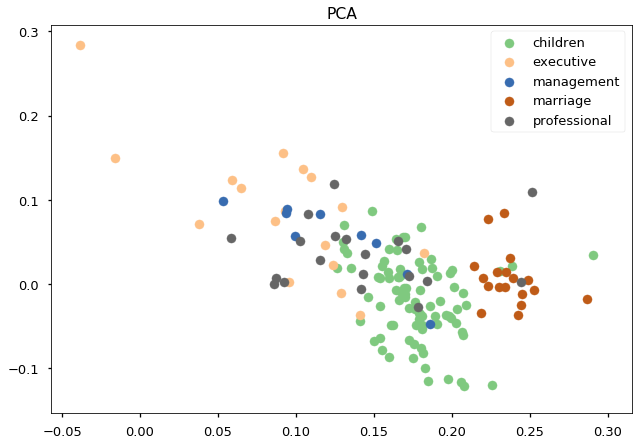

(219, 2) ['John', 'Mary', 'doctor', 'engineer', 'husband', 'wife']


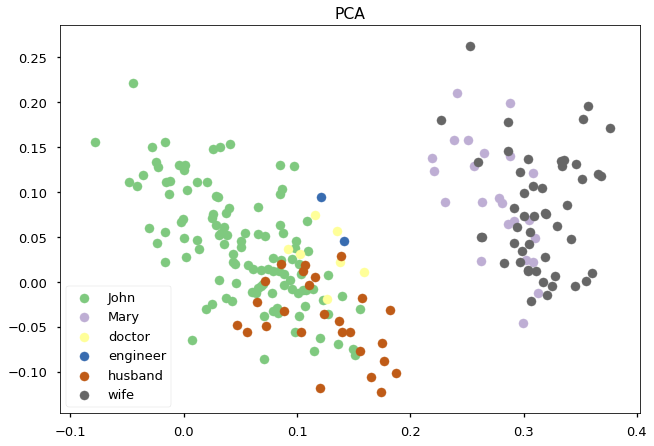

In [123]:
X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['he', 'she'])
X = np.asarray(X)
norm = np.apply_along_axis(np.linalg.norm, 1, X)
X = X / norm[:, None]
pca = PCA(n_components = 2)
pca.fit(X)
print(pca.explained_variance_ratio_)

X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['executive','professional', 'management', 'marriage', 'children'])
X = np.asarray(X)
norm = np.apply_along_axis(np.linalg.norm, 1, X)
X = X / norm[:, None]
do_plot(pca.transform(X), 'PCA', labels = labels)


X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['husband', 'wife', 'Mary', 'John', 'engineer', 'doctor' ])
X = np.asarray(X)
norm = np.apply_along_axis(np.linalg.norm, 1, X)
X = X / norm[:, None]


do_plot(pca.transform(X), 'PCA', labels=labels, circ = False)